## Final Project Submission

Please fill out:
* Student name: Michael Mahoney
* Student pace:  part time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


General notes:
look into movies that are less expensive. This might be a way to limit capital risk if Microsoft doesn't want to go super hard into the investment. 
look at distribution of the top grossing files. Maybe give them a distribution of files to go for, show which ones will have pretty reliable income and which ones are the longshots but have huge payoff potential. 

imports os and glob
use pd.merge

In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import seaborn as sns

In [2]:
dfBomGross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
dfimdbName = pd.read_csv('zippedData/imdb.name.basics.csv.gz')

dfimdbTitleAkas = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
columns = list(dfimdbTitleAkas.columns)
columns[0] = 'tconst'
dfimdbTitleAkas.columns = columns

dfimdbTitleBasics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
dfimdbTitleCrew = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
dfimdbTitlePrincipals = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
dfimdbTitleRatings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
dfRtMovie = pd.read_csv('zippedData/rt.movie_info.tsv.gz',sep='\t')
dfRtReviews = pd.read_csv('zippedData/rt.reviews.tsv.gz',sep='\t', encoding='latin_1')
dfTmbd = pd.read_csv('zippedData/tmdb.movies.csv.gz')
dfTn = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

#check data frame method keys. Use x.columns
listOfImdbDfs = [dfimdbName,dfimdbTitleAkas,dfimdbTitleBasics,dfimdbTitleCrew,dfimdbTitlePrincipals,dfimdbTitleRatings]
for x in listOfImdbDfs:
    if('tconst' in x.keys()):
        x['tconst'] = x['tconst'].astype('str')

In [3]:
listOfDfs = [dfBomGross, dfimdbName, dfimdbTitleAkas, dfimdbTitleBasics, dfimdbTitleCrew, dfimdbTitlePrincipals, dfimdbTitleRatings, dfRtMovie, dfRtReviews, dfTmbd, dfTn]
for x in listOfDfs:
    display(x.head())

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


,tconst,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## Looking at this structure, it's clear that joining tables with only financial information isn't going to give much insight as to why they perform the way they do. For the sake of saving time later, I'm going to combine all of the IMDB info here and use the names of the movies we do have income information on to sort through the IMDB list which is much more complete in terms of information.

In [4]:
dfimdbTitleAkas['tconst'] = dfimdbTitleAkas['tconst'].astype('str')
dfimdbTitleBasics['tconst'] = dfimdbTitleBasics['tconst'].astype('str')
dfimdbTitleCrew['tconst'] = dfimdbTitleCrew['tconst'].astype('str')
dfimdbTitlePrincipals['tconst'] = dfimdbTitlePrincipals['tconst'].astype('str')
dfimdbTitleRatings['tconst'] = dfimdbTitleRatings['tconst'].astype('str')
imdbList = [dfimdbTitleAkas,dfimdbTitleBasics,dfimdbTitleCrew,dfimdbTitlePrincipals,dfimdbTitleRatings]


df = pd.DataFrame()
def joinThings(df1, df2):
    df = df1.merge(df2,how='left',left_on='tconst', right_on='tconst')
    return df


df = joinThings(joinThings(joinThings(joinThings(dfimdbTitleAkas,dfimdbTitleBasics),dfimdbTitleCrew),dfimdbTitlePrincipals),dfimdbTitleRatings)
df.head(1)

,tconst,ordering_x,title,region,language,types,attributes,is_original_title,primary_title,original_title,...,genres,directors,writers,ordering_y,nconst,category,job,characters,averagerating,numvotes
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,Jurassic World,Jurassic World,...,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",10.0,nm0189777,producer,producer,NaN,7.0,539338.0


In [5]:
df.isna().sum()/len(df)

tconst               0.000000
ordering_x           0.000000
title                0.000000
region               0.162170
language             0.866354
types                0.453540
attributes           0.952151
is_original_title    0.000009
primary_title        0.000000
original_title       0.000005
start_year           0.000000
runtime_minutes      0.079383
genres               0.008642
directors            0.004945
writers              0.080585
ordering_y           0.000349
nconst               0.000349
category             0.000349
job                  0.744279
characters           0.611412
averagerating        0.147116
numvotes             0.147116
dtype: float64

In [6]:
df.drop(columns = ['language', 'types', 'attributes', 'job', 'characters','category', 'ordering_y', 'ordering_x', 'nconst', 'is_original_title', 'region', 'title', 'original_title'], inplace = True)

In [7]:
df['duplicated'] = df.duplicated()
df = df.drop(df.loc[df['duplicated']].index)

In [8]:
df2 = dfTn.merge(dfBomGross, how = 'left', left_on='movie', right_on = 'title')
df2.head()

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",NaN,NaN,NaN,NaN,NaN
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011.0
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",NaN,NaN,NaN,NaN,NaN
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",Avengers: Age of Ultron,BV,459000000.0,946400000,2015.0
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",NaN,NaN,NaN,NaN,NaN


In [9]:
listOfNames = [x for x in df2.movie.unique()]
def test(x):
    if x in listOfNames:
        return True
    else:
        return False
df['inDf2'] = df['primary_title'].isin(listOfNames)
dfInfo = df.loc[df['inDf2']]

In [10]:

# convert object data to int data for analysis
df2 = dfTn.merge(dfBomGross, how = 'left', left_on='movie', right_on = 'title' )

df2['domestic_gross_x'] = [x.replace(',','').replace('$','') for x in df2['domestic_gross_x']]
df2['domestic_gross_x'] = df2['domestic_gross_x'].astype('int64')
df2['worldwide_gross'] = [x.replace(',','').replace('$','') for x in df2['worldwide_gross']]
df2['worldwide_gross'] =df2['worldwide_gross'].astype('int64')
df2['production_budget'] = [x.replace(',','').replace('$','') for x in df2['production_budget']]
df2['production_budget'] =df2['production_budget'].astype('int64')

df2 = df2.merge(dfInfo, how = 'left', left_on = 'movie', right_on = 'primary_title')
df2['profit'] = df2['worldwide_gross'] - df2['production_budget']
df2.head(1)

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,...,start_year,runtime_minutes,genres,directors,writers,averagerating,numvotes,duplicated,inDf2,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,NaN,NaN,NaN,NaN,...,2011.0,93.0,Horror,nm3786927,"nm2179863,nm4392664",6.1,43.0,False,True,2351345279


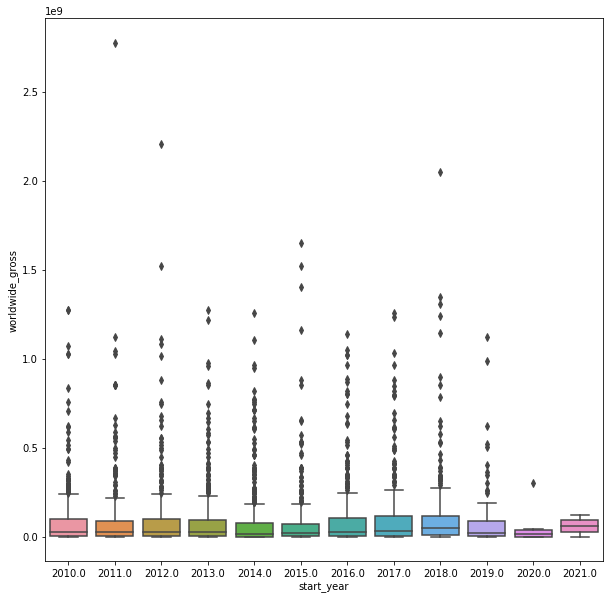

In [11]:
fig,ax = plt.subplots(figsize = (10,10),
                      ncols = 1, nrows = 1)
ax = sns.boxplot(x = df2['start_year'], y = df2['worldwide_gross'])

array([[1.        , 0.60608818],
       [0.60608818, 1.        ]])

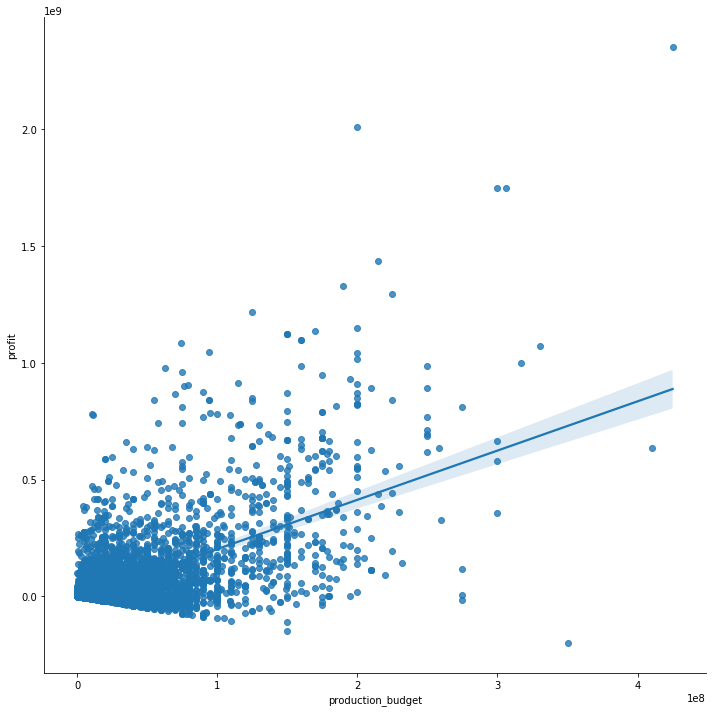

In [12]:
display(np.corrcoef(df2['production_budget'], df2['profit']))
thing = sns.lmplot(x = 'production_budget', y ='profit', data = df2, height = 10 )

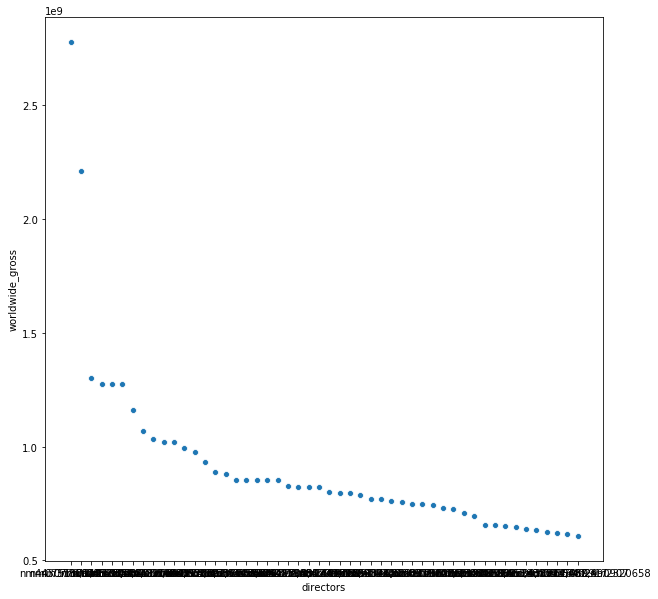

In [13]:
x = df2.groupby('directors').mean().sort_values('worldwide_gross', ascending = False).index[:50]
y = df2.groupby('directors').mean().sort_values('worldwide_gross', ascending = False)['worldwide_gross'][:50]
fig,ax = plt.subplots(figsize = (10,10),
                      ncols = 1, nrows = 1)
ax = sns.scatterplot(x = x, y = y)

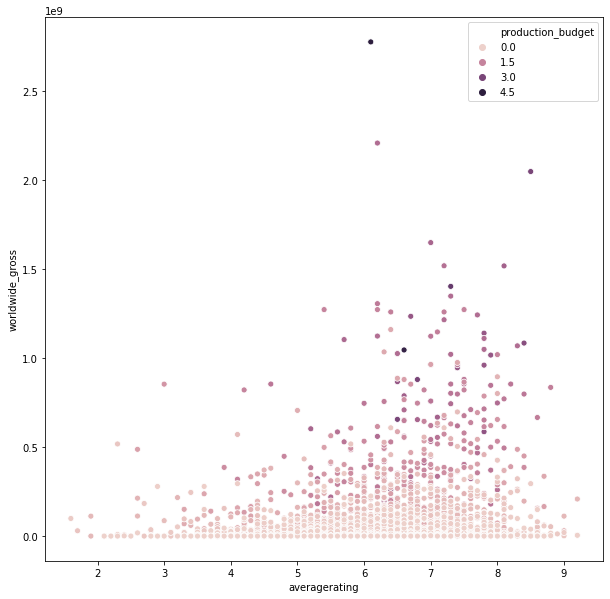

In [14]:
x = df2['averagerating']
y = df2['worldwide_gross']

fig,ax = plt.subplots(figsize = (10,10),
                      ncols = 1, nrows = 1)
ax = sns.scatterplot(x=x, y=y, hue = df2['production_budget'])

In [15]:
def isPrime(num):
    test = [num % x != 0 for x in range(2,num)]
    if all(test):
        return num
primes = []   
for x in range(2, 1000):
    if isPrime(x):
        primes.append(isPrime(x))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


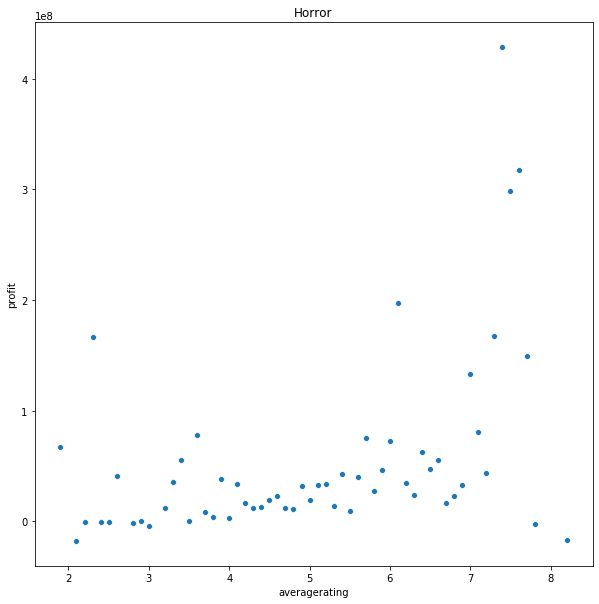

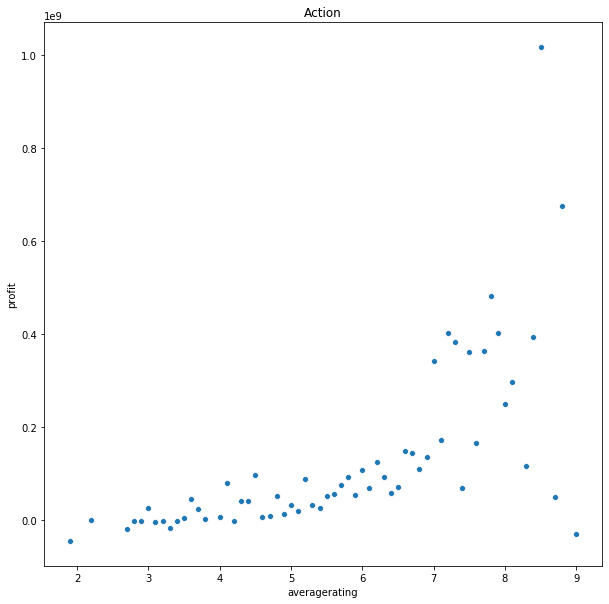

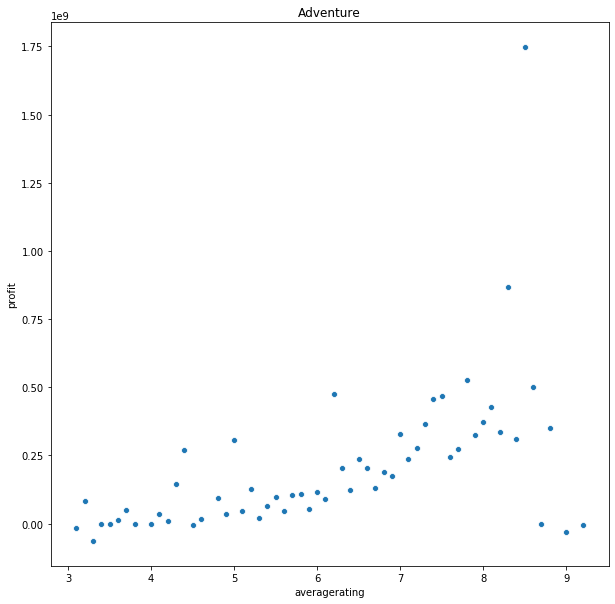

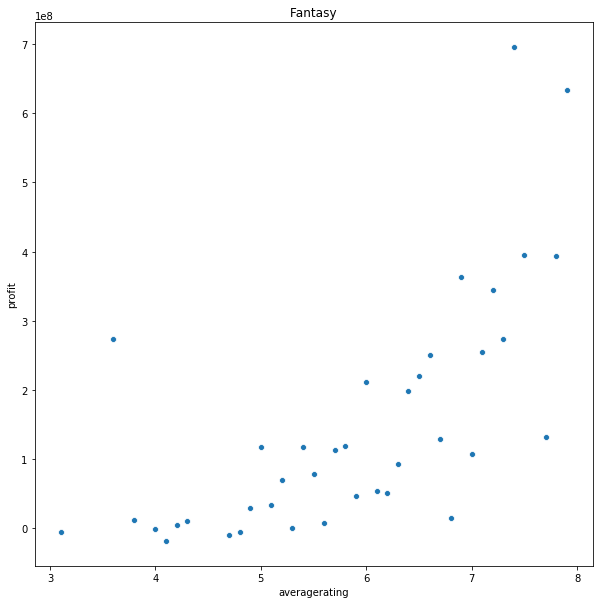

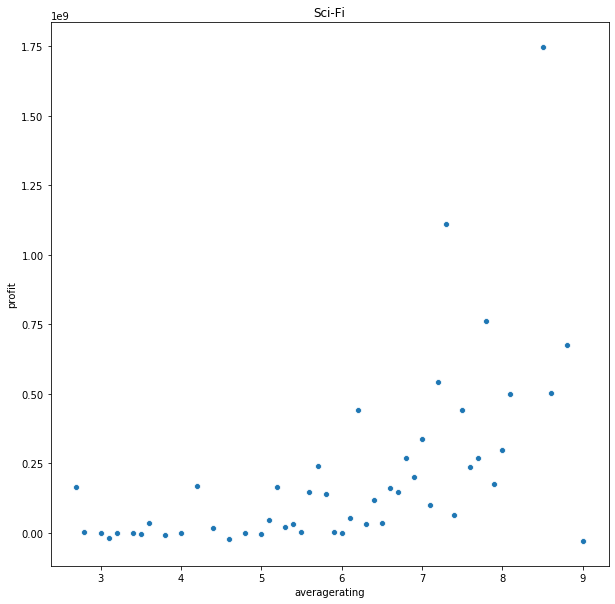

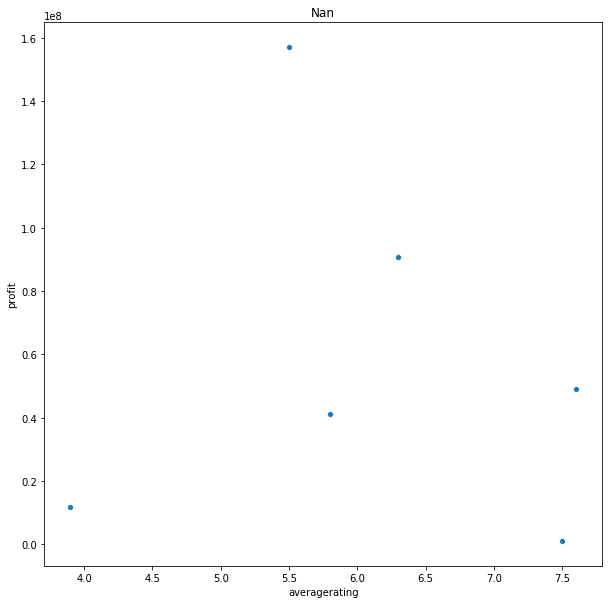

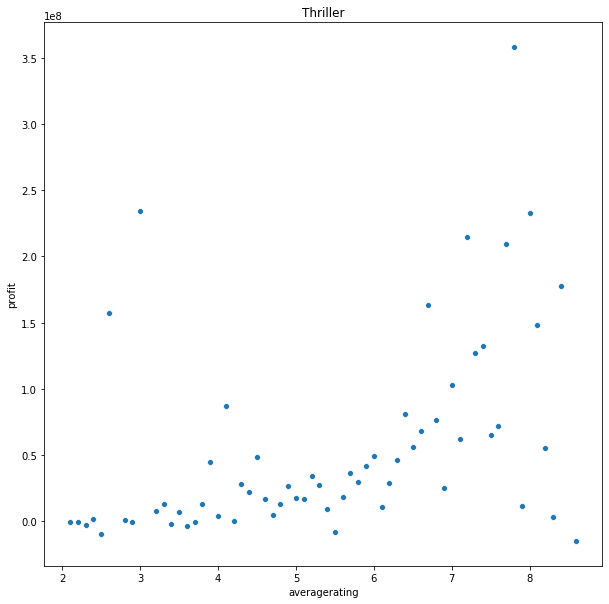

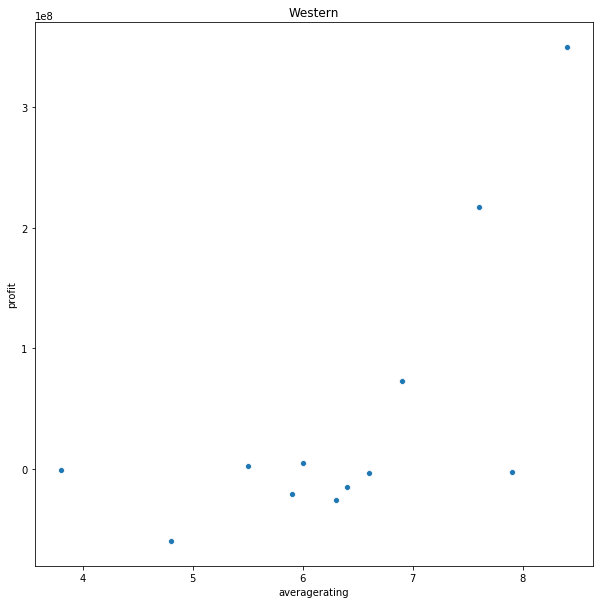

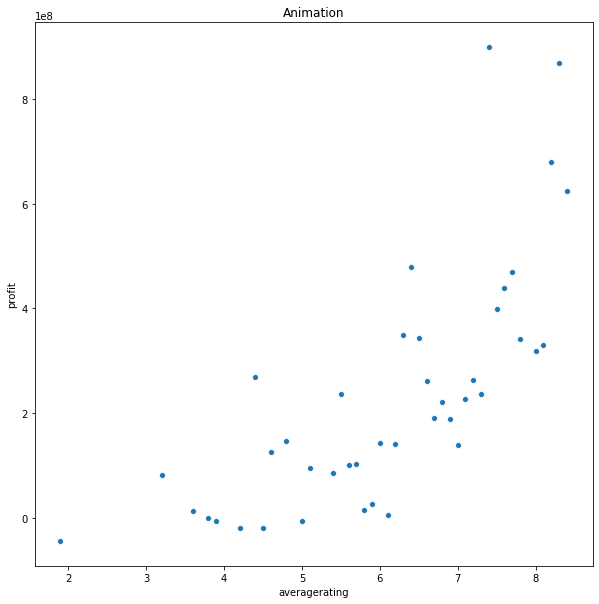

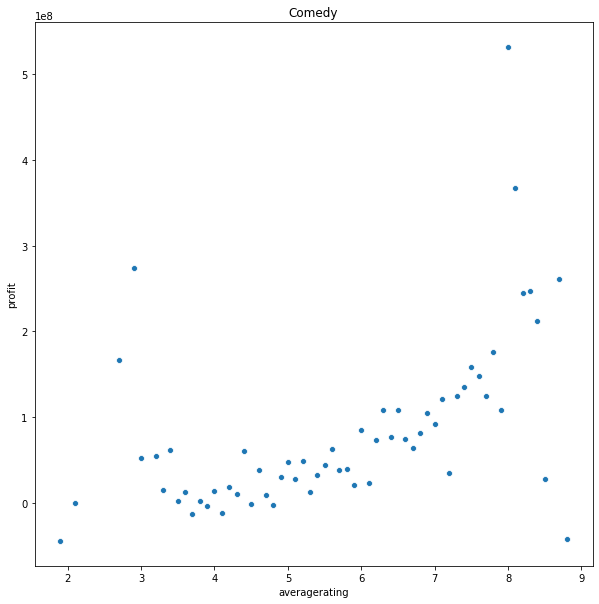

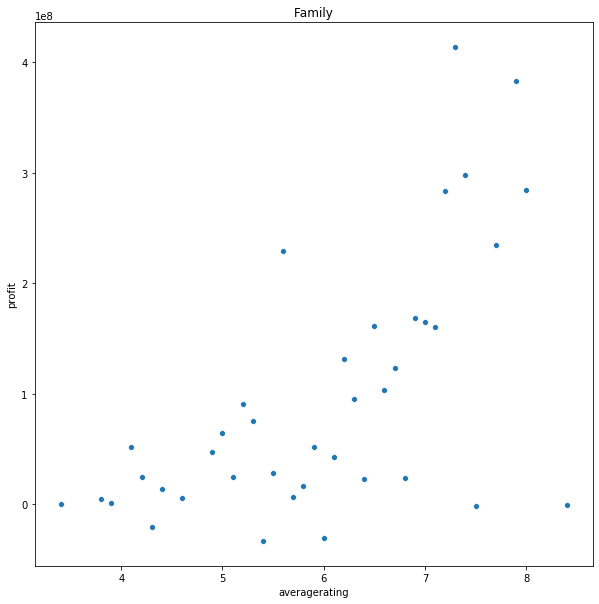

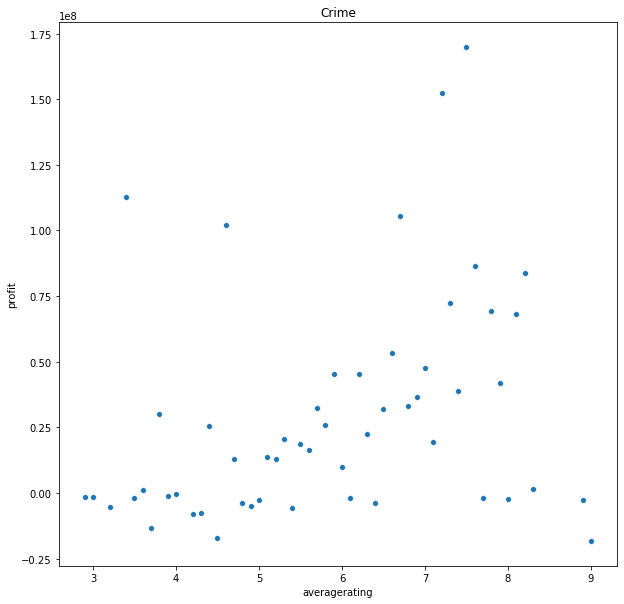

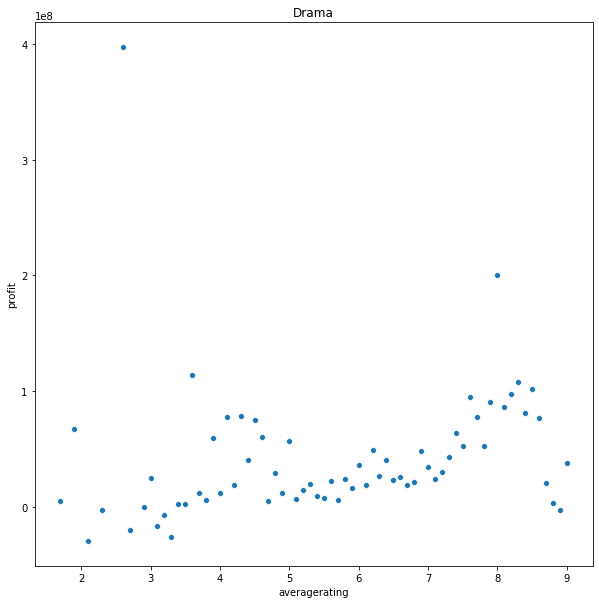

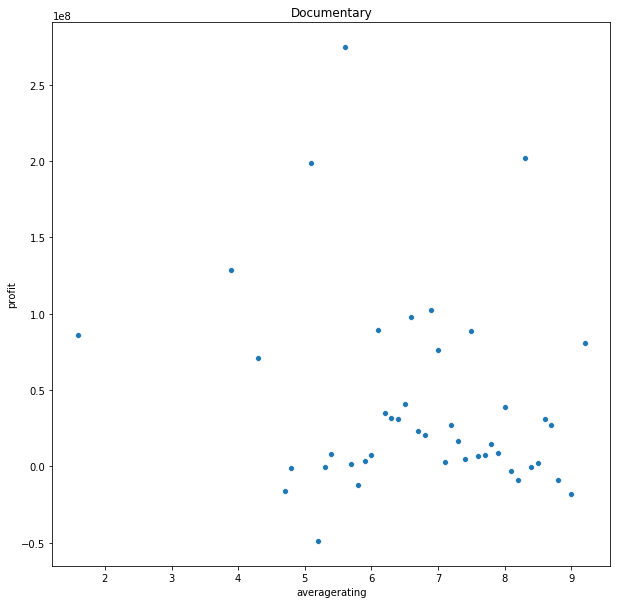

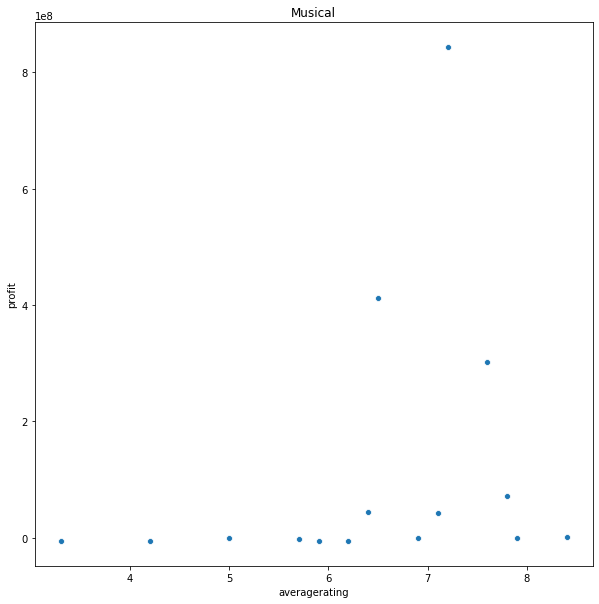

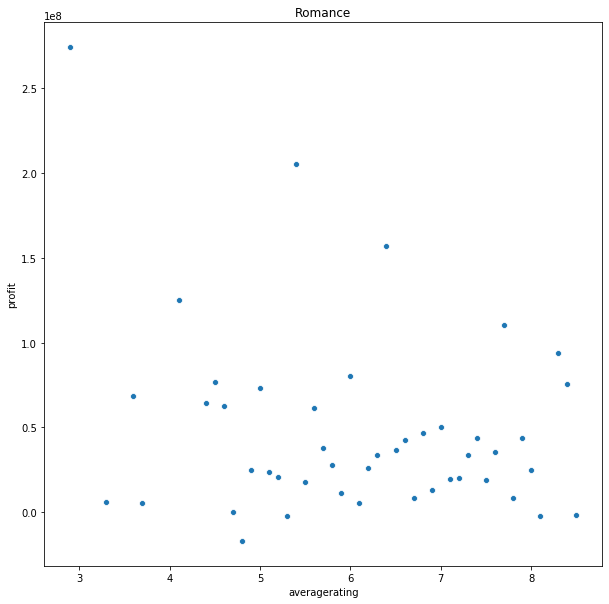

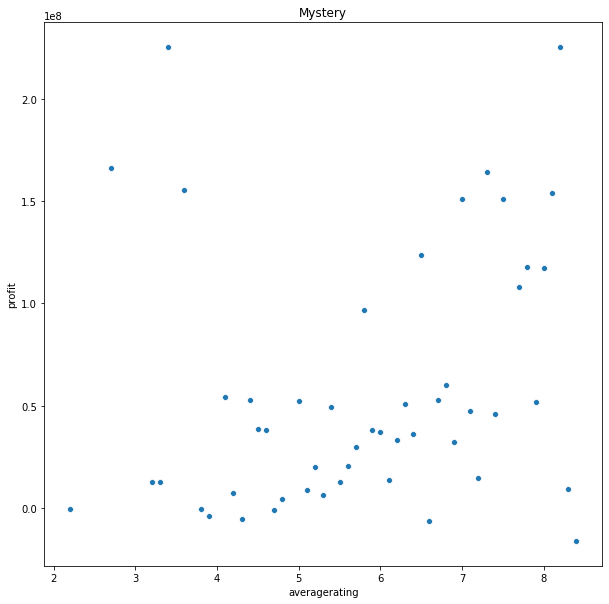

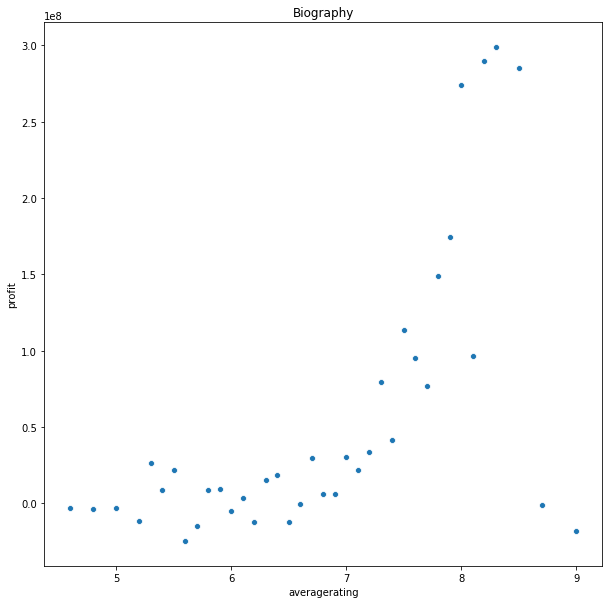

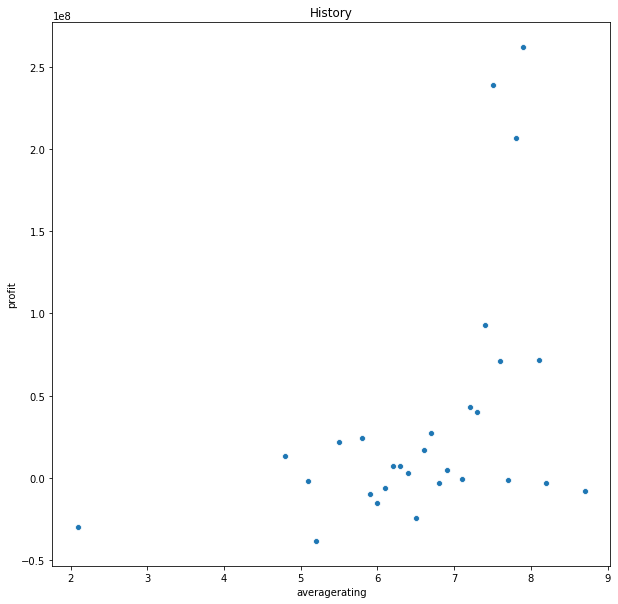

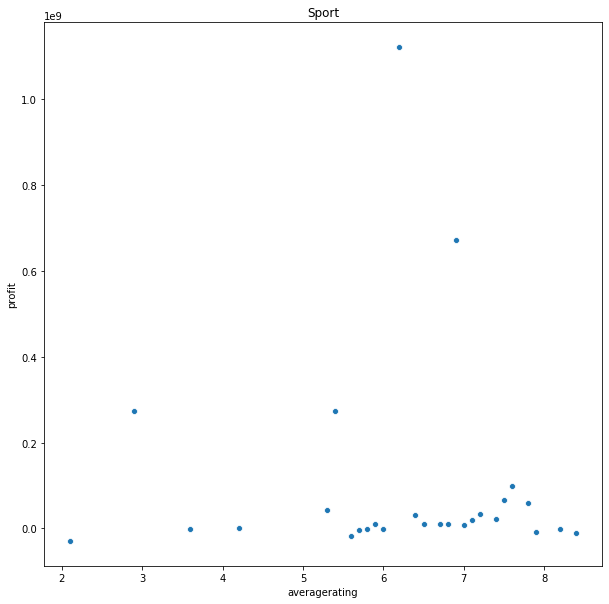

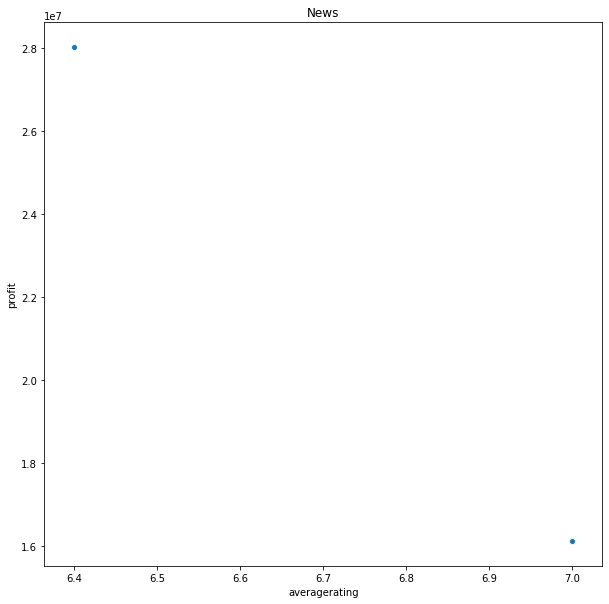

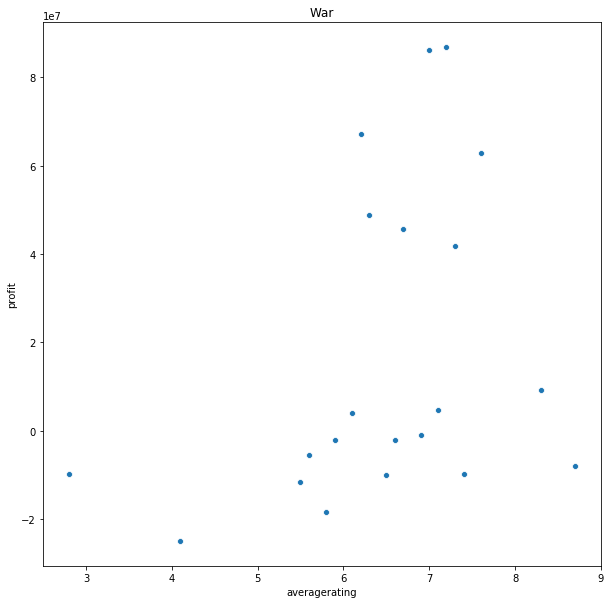

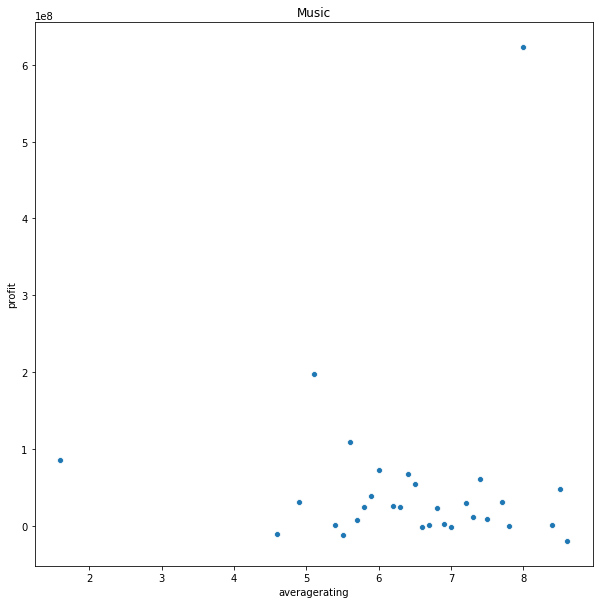

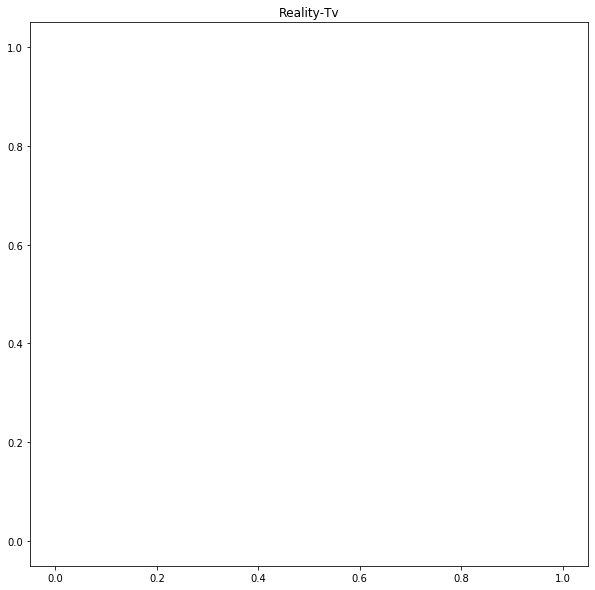

In [41]:
# convert object data to int data for analysis
df2 = dfTn.merge(dfBomGross, how = 'left', left_on='movie', right_on = 'title' )

df2['domestic_gross_x'] = [x.replace(',','').replace('$','') for x in df2['domestic_gross_x']]
df2['domestic_gross_x'] = df2['domestic_gross_x'].astype('int64')
df2['worldwide_gross'] = [x.replace(',','').replace('$','') for x in df2['worldwide_gross']]
df2['worldwide_gross'] =df2['worldwide_gross'].astype('int64')
df2['production_budget'] = [x.replace(',','').replace('$','') for x in df2['production_budget']]
df2['production_budget'] =df2['production_budget'].astype('int64')

df2 = df2.merge(dfInfo, how = 'left', left_on = 'movie', right_on = 'primary_title')
df2['profit'] = df2['worldwide_gross'] - df2['production_budget']

df2['genres'] = df2['genres'].astype('str')

genresList = []
for x in df2['genres']:
    temp = x.lower().strip().split(',')
    for i in temp:
        if i in genresList:
            continue
        else:
            genresList.append(i)
genresDict = {genresList[i]:primes[i] for i in range(len(genresList))}

df2['genres'] = [x.strip().lower().split(',') for x in df2['genres']]

def productFunc(array):
    runningTotal = 1
    for x in array:
        runningTotal = runningTotal*genresDict[x]
    return runningTotal
    
df2['genresCode'] = [productFunc(x) for x in df2['genres']]  

def createAThing(df):
    for i in genresDict.keys():
        df[i] = [(x % genresDict[i] == 0) for x in df['genresCode']]
        x = df.loc[df[i]].groupby('averagerating').mean().sort_values('profit', ascending=False).index
        y = df.loc[df[i]].groupby('averagerating').mean().sort_values('profit', ascending=False)['profit']
        fig,ax = plt.subplots(figsize = (10,10), ncols = 1, nrows = 1)

        ax = sns.scatterplot(x, y)
        ax.set_title(i.title())
    
createAThing(df2)

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,...,start_year,runtime_minutes,genres,directors,writers,averagerating,numvotes,duplicated,inDf2,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,NaN,NaN,NaN,NaN,...,2011.0,93.0,Horror,nm3786927,"nm2179863,nm4392664",6.1,43.0,False,True,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,...,2011.0,136.0,"Action,Adventure,Fantasy",nm0551128,"nm0254645,nm0744429,nm0064181,nm0938684,nm0694627",6.6,447624.0,False,True,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,NaN,NaN,NaN,NaN,...,2019.0,113.0,"Action,Adventure,Sci-Fi",nm1334526,"nm0126208,nm1079208,nm1079211,nm1334526,nm0456...",6.0,24451.0,False,True,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,Avengers: Age of Ultron,BV,459000000.0,946400000,...,2015.0,141.0,"Action,Adventure,Sci-Fi",nm0923736,"nm0923736,nm0498278,nm0456158,nm0800209,nm4160687",7.3,665594.0,False,True,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,NaN,NaN,NaN,NaN,...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,999721747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6934,78,"Dec 31, 2018",Red 11,7000,0,0,NaN,NaN,NaN,NaN,...,2019.0,77.0,"Horror,Sci-Fi,Thriller",nm0001675,"nm1897406,nm0001675",5.6,43.0,False,True,-7000
6935,79,"Apr 2, 1999",Following,6000,48482,240495,NaN,NaN,NaN,NaN,...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,234495
6936,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,NaN,NaN,NaN,NaN,...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,-3662
6937,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,NaN,NaN,NaN,NaN,...,2013.0,76.0,"Drama,Horror,Thriller","nm4766951,nm5792320",nm4766951,5.4,72.0,False,True,-1400


,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,...,inDf2,profit,action,adventure,fantasy,family,sci-fi,musical,music,war
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,NaN,NaN,NaN,NaN,...,True,2351345279,False,False,False,False,False,False,False,False
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,...,True,635063875,True,True,True,False,False,False,False,False
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,NaN,NaN,NaN,NaN,...,True,-200237650,True,True,False,False,True,False,False,False
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,Avengers: Age of Ultron,BV,459000000.0,946400000,...,True,1072413963,True,True,False,False,True,False,False,False
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,NaN,NaN,NaN,NaN,...,NaN,999721747,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6934,78,"Dec 31, 2018",Red 11,7000,0,0,NaN,NaN,NaN,NaN,...,True,-7000,False,False,False,False,True,False,False,False
6935,79,"Apr 2, 1999",Following,6000,48482,240495,NaN,NaN,NaN,NaN,...,NaN,234495,False,False,False,False,False,False,False,False
6936,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,NaN,NaN,NaN,NaN,...,NaN,-3662,False,False,False,False,False,False,False,False
6937,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,NaN,NaN,NaN,NaN,...,True,-1400,False,False,False,False,False,False,False,False


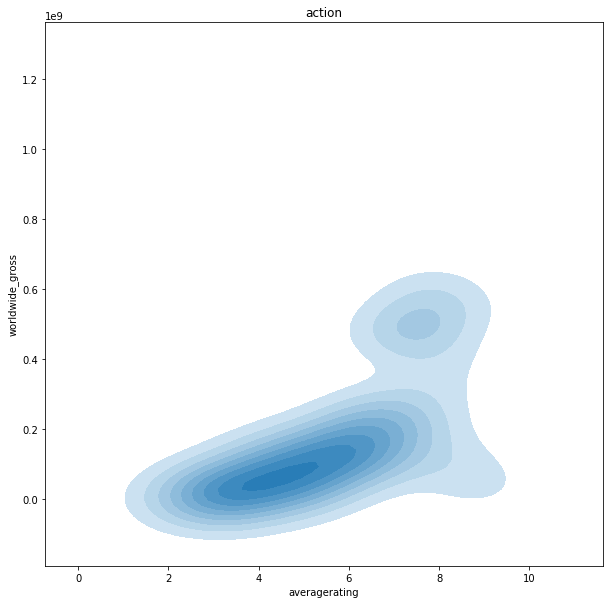

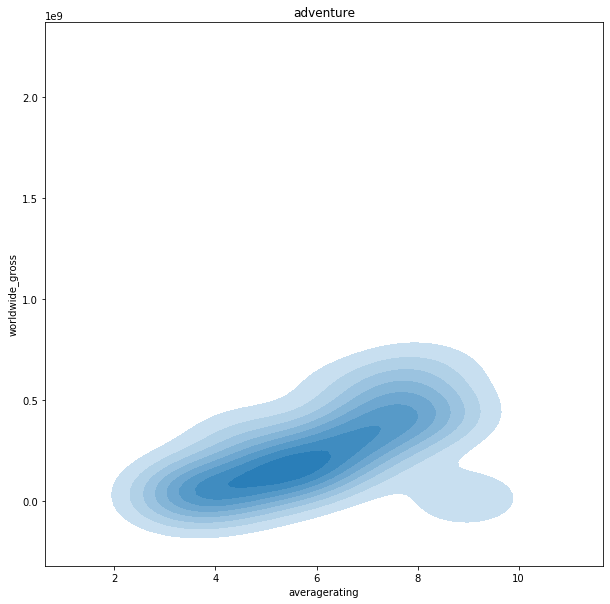

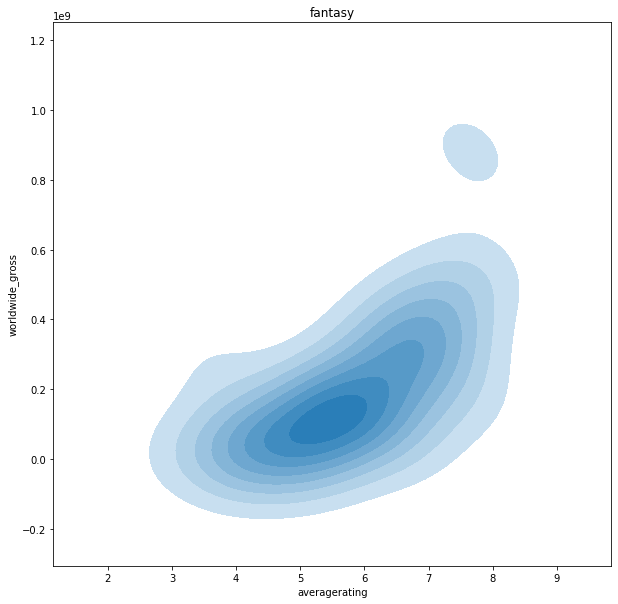

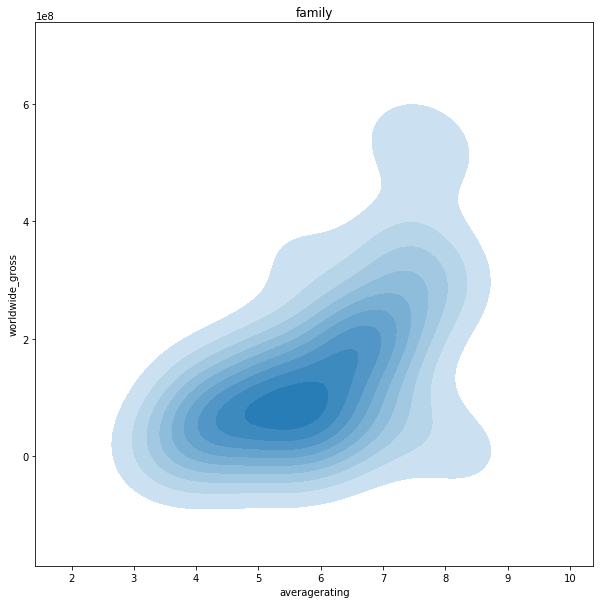

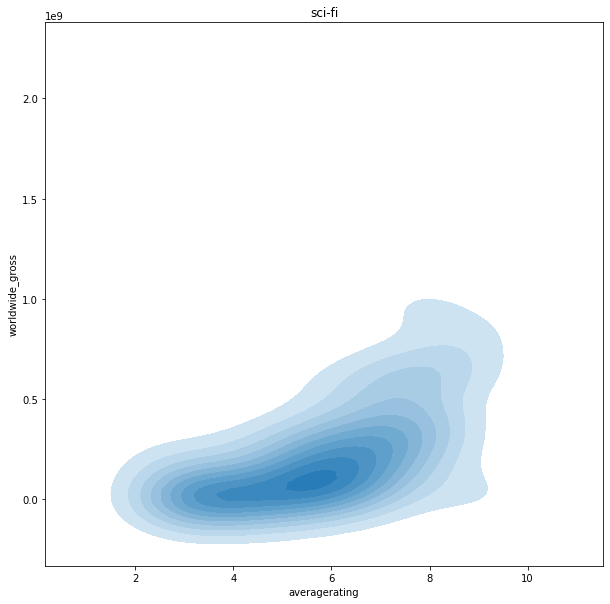

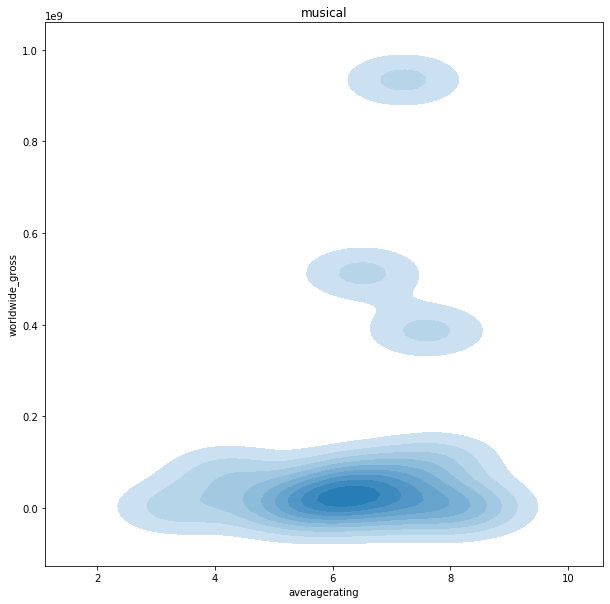

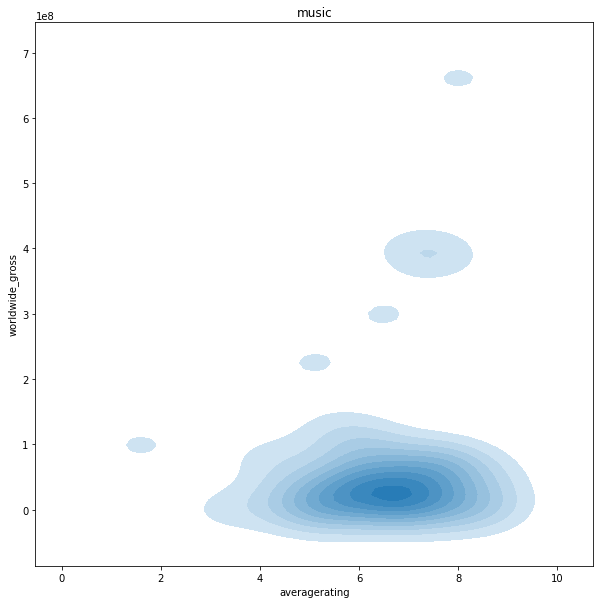

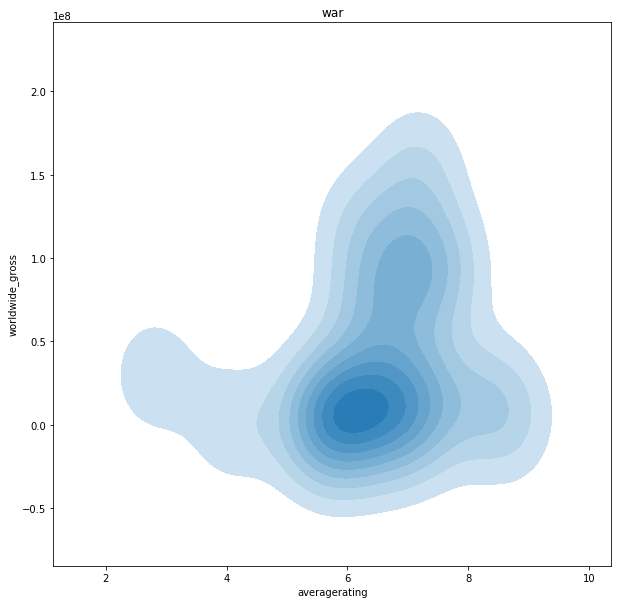

In [38]:
# https://seaborn.pydata.org/examples/multiple_joint_kde.html
df2 = dfTn.merge(dfBomGross, how = 'left', left_on='movie', right_on = 'title' )

df2['domestic_gross_x'] = [x.replace(',','').replace('$','') for x in df2['domestic_gross_x']]
df2['domestic_gross_x'] = df2['domestic_gross_x'].astype('int64')
df2['worldwide_gross'] = [x.replace(',','').replace('$','') for x in df2['worldwide_gross']]
df2['worldwide_gross'] =df2['worldwide_gross'].astype('int64')
df2['production_budget'] = [x.replace(',','').replace('$','') for x in df2['production_budget']]
df2['production_budget'] =df2['production_budget'].astype('int64')

df2 = df2.merge(dfInfo, how = 'left', left_on = 'movie', right_on = 'primary_title')
df2['profit'] = df2['worldwide_gross'] - df2['production_budget']

df2['genres'] = df2['genres'].astype('str')
display(df2)
def kdePlotFunc(df,column,categoryArray):

    for i in categoryArray:
        df[i] = [i in x.lower() for x in df[column]]
        x = df.loc[df[i]].groupby('averagerating').mean().sort_values('worldwide_gross', ascending=False).index
        y = df.loc[df[i]].groupby('averagerating').mean().sort_values('worldwide_gross', ascending=False)['worldwide_gross']
        fig,ax = plt.subplots(figsize = (10,10), ncols = 1, nrows = 1)
        ax = sns.kdeplot(x, y,shade=True, shade_lowest=False)
        ax.set_title(i)
    
kdePlotFunc(df2,'genres', ['action', 'adventure','fantasy', 'family', 'sci-fi', 'musical', 'music', 'war']);
display(df2)




In [39]:
dfTop = df2.sort_values('worldwide_gross', ascending = False)[:100]
dfTop.shape

(100, 31)

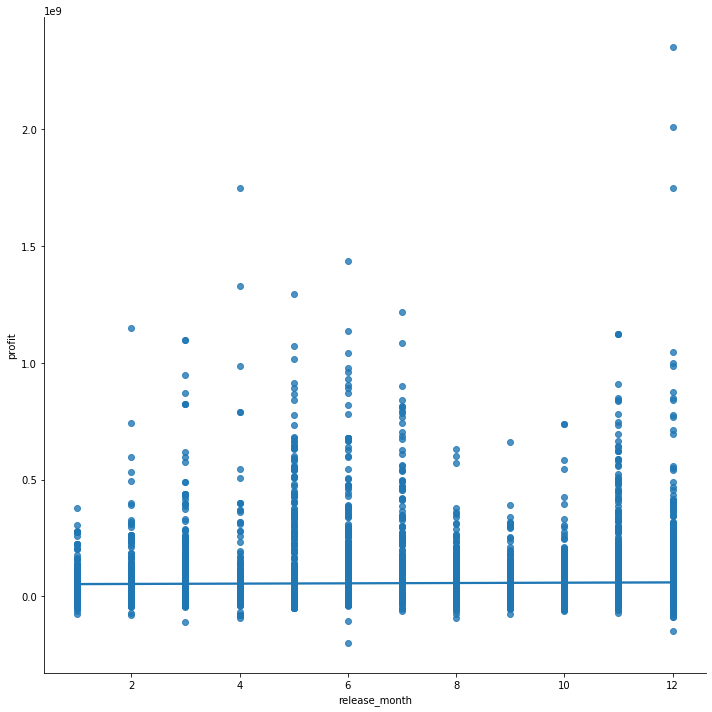

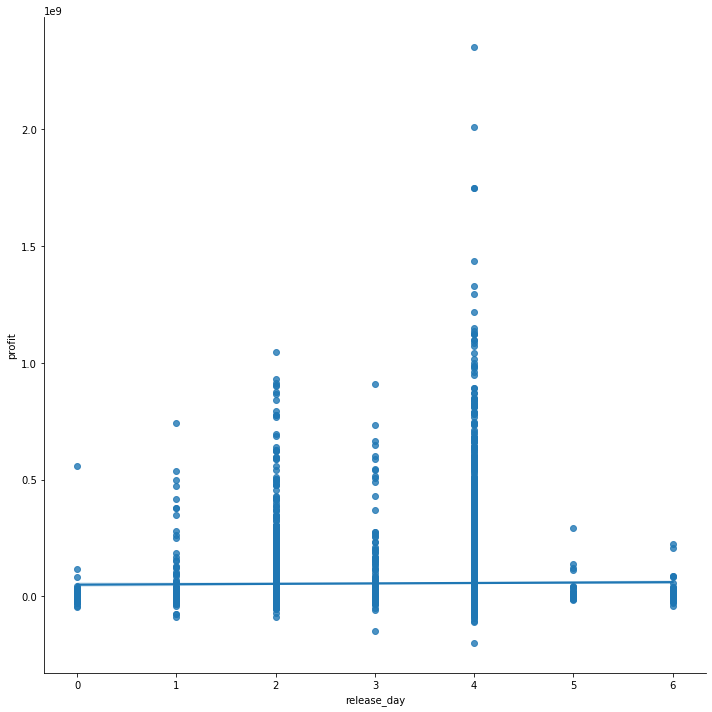

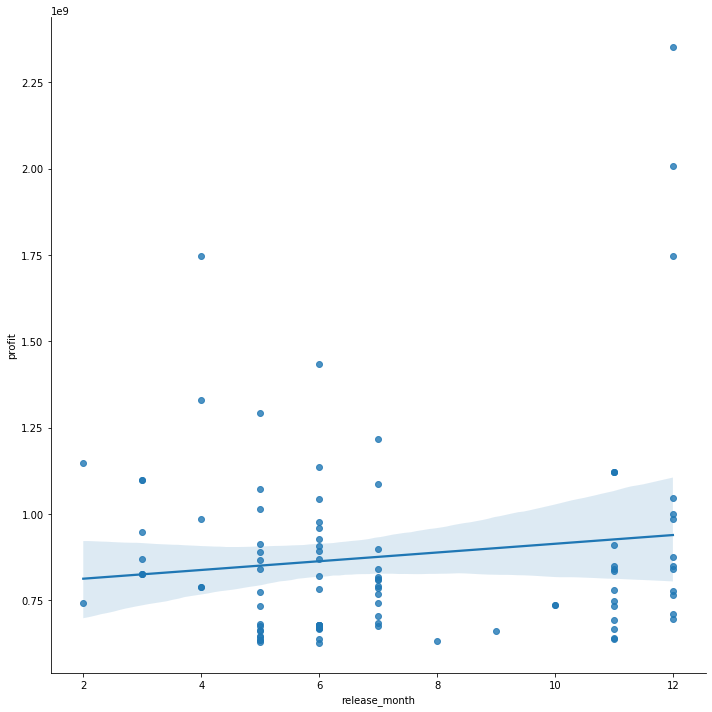

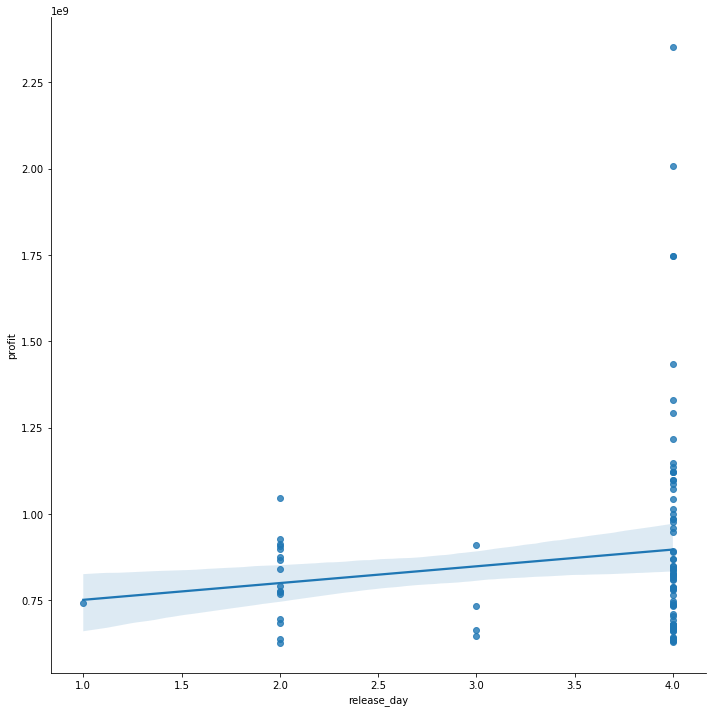

In [40]:
#https://www.interviewqs.com/ddi_code_snippets/extract_month_year_pandas


df2['release_date'] = pd.to_datetime(df2['release_date'])
df2['release_month'] = pd.DatetimeIndex(df2['release_date']).month
df2['release_day'] = pd.DatetimeIndex(df2['release_date']).weekday
df2 = df2.sort_values('profit', ascending = False)


thing1 = sns.lmplot(x = 'release_month', y ='profit', data = df2, height = 10 )
thing2 = sns.lmplot(x = 'release_day', y ='profit', data = df2, height = 10 )

thing3 = sns.lmplot(x = 'release_month', y ='profit', data = df2[:100], height = 10 )
thing4 = sns.lmplot(x = 'release_day', y ='profit', data = df2[:100], height = 10 )